# Исследование объявлений о продаже квартир

В данном исследовании нам предстоит исследовать объявления о продаже квартир в Санкт_Петербурге и Ленинградской области.

***Цель:*** **определить и оценить факторы, влияющие на ценооборазование при выставлении жилой недвижимости на продажу. Научиться определять рыночную стоимость объектов недвижимости.**

***План работы:***
- изучить исходные данные,
- удалить строки, по которым невозможно провести анализ,
- заполнить пропуски в ячейках,
- привести датафрейм к правильному формату,
- устранить дубликаты,
- создать новые столбцы с параметрами, необходимыми для дальнейшего анализа,
- провести исследовательский анализ данных
- сделать выводы.


## Изучение общей информации

### Подключим библиотеки и откроем документ

In [1]:
#подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#открываем файл csv
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
except:
    data = pd.read_csv('C:\\Users\\ignat\\OneDrive\\Рабочий стол\\Аналитик Практикум\\real_estate_data.csv', sep='\t')

### Выгрузим первые 5 строк датафрейма для ознакомления

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


###  Посмотрим на общую информацию по датафрейму

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

###  Для информации также сразу посмотрим на гистограммы всех количественных значений

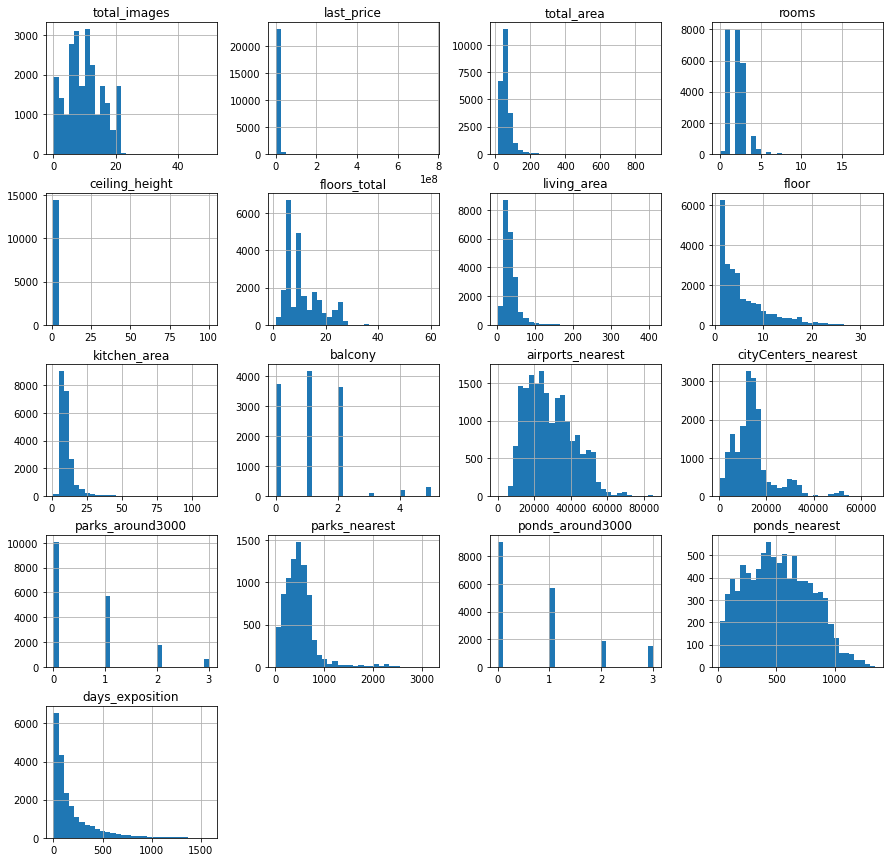

In [5]:
data.hist(bins=30, figsize=(15, 15));

**Вывод:** Имеем датафрейм из 23699 строк и 21 колонки. Некоторые типы данных предстоит изменить: `floors_total, balcony, parks_around3000, days_exposition ponds_around3000` превести в `int`, так как являются целыми величинами, а `is_apartment` - в `bool`, а также привести формат даты к читаемому. Также имеется большое количество пропущенных данных. Некоторые из них следует восстановить.
Как видно по графикам, далеко не все из них имеют ожидаемый "правильный" вид. Значит в данных имеются погрешности. Вот их и будем искать и исправлять.

## Предобработка данных

### Смотрим информацию о количестве пустых ячеек по индексам

In [6]:
#смотрим долю пропущенных значений в процентах
data.isna().sum() / len(data) * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

**Вывод:** видно, что у 0,2% объявлений не указан населенный пункт. В контексте исследования данная информация является важной и ее отсутсвие может повлиять на конечный результат. Поэтому все объявления с таким пропуском удаляем.
Примерно такая же ситуация обстоит и с общей этажностью здания - не заполнено в 0,36% случаях. Данные объявления тоже удаляем, так как в конечном итоге будем также смотреть влияние этажа, на котором находится квартира, на цену. А в данном случае установить, является ли этаж последним невозможно.

### Удаляем неинформативные строки

In [7]:
data = data.dropna(subset=['locality_name', 'floors_total'])

###  Заполняем пустые ячейки

В 8,02% объявлениях отсутствует информация о жилой плащади, а в 9,61% нет данных о плащади кухни. Для заполнения данных значений нужно найти срений коэффициент отношения жилой площади к общей, и площади кухни к общей площади соответственно. Добавим данные коэффиценты к имеющимся строкам датафрейм.

In [8]:
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

Создадим сводную таблицу. чтоюы вычислить среднее значение.

In [9]:
area_ratio_data = data.pivot_table(index='rooms', values=['living_area_ratio', 'kitchen_area_ratio'], aggfunc='median')
area_ratio_data

,kitchen_area_ratio,living_area_ratio
rooms,,
0,NaN,0.689655
1,0.247779,0.482638
2,0.161034,0.585470
3,0.128496,0.631833
4,0.112245,0.659789
5,0.105386,0.651842
6,0.098853,0.679509
7,0.083717,0.681670
8,0.109170,0.688475


По всему выходит, что картиры без комнат не имеют кухни. Квартиры такого формата - это студии, где кухня является одновременно и жилой площадью. Установим коэффициент равный 0 для этих квартир

In [10]:
area_ratio_data = area_ratio_data.fillna(0)
area_ratio_data

,kitchen_area_ratio,living_area_ratio
rooms,,
0,0.000000,0.689655
1,0.247779,0.482638
2,0.161034,0.585470
3,0.128496,0.631833
4,0.112245,0.659789
5,0.105386,0.651842
6,0.098853,0.679509
7,0.083717,0.681670
8,0.109170,0.688475


Таблица коэффициентов готова, приступаем к заполнению пропусков. Сначала заполним пустые значения коэффициентов в датафрейме.

In [11]:
#заполняем пустые ячейки коэффициентов жилой площади 
data_mask = data['living_area_ratio'].isna()
data.loc[data_mask, 'living_area_ratio'] = \
    data.loc[data_mask, ['rooms']].join(area_ratio_data, on='rooms')['living_area_ratio']

In [12]:
#заполняем пустые ячейки коэффициентов площади кухни
data_mask = data['kitchen_area_ratio'].isna()
data.loc[data_mask, 'kitchen_area_ratio'] = \
    data.loc[data_mask, ['rooms']].join(area_ratio_data, on='rooms')['kitchen_area_ratio']

In [13]:
#заполняем пустые значения площади
data['living_area'] = data['living_area'].fillna(data['living_area_ratio'] * data['total_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area_ratio'] * data['total_area'])

Логично предположить, что если не заполнено число балконов, то в помещении их нет. То же касается и парков и водёмов в радиусе 3 км - их нет поблизости. Поскольку данные ячейки заполняются автоматически на основе геоданных, можно сделать вывод, что таких объектов действительно нет, ошибки быть не может. В случае заполения данных вручную, потребовалась бы дополнительная проверка на соответсвие незаполненных значений со столбцом, в котором указано расстояние до ближайшего объекта.

In [15]:
#заполняем пропуски и меняем тип данных
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int64')

data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype('int64')

data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')

#также меняем формат на правильный
data['floors_total'] = data['floors_total'].astype('int64')
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

В 13,42% случаев не заполнено количество дней, которое прошло с момента публикации объявления до продажи квартиры либо снятия объявления с публикации. Вероятно, это означает, что объявление всё ещё активно на момент публикации. Оставим данные строки пустыми.

Проверим, какие значения содержатся в стобце `is_apartment`, чтобы в дальнейшем перевести его к правильному формату данных.

In [16]:
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

Если данный пункт не заполнен, следует сделать вывод, что квартира апартаментами не является. Заполним пустые ячейки значением `False`, а потом переведём данные во всём столбце к типу `bool`

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'] == True

Проверим, что всё сделано правильно.

In [18]:
data['is_apartment'].value_counts()

False    23515
True        50
Name: is_apartment, dtype: int64

Всё отлично. Далее посмотрим на высоту потолка.

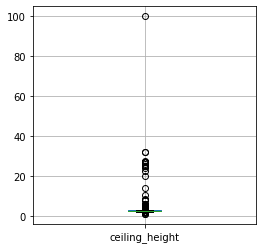

In [19]:
data.boxplot('ceiling_height', figsize=(4,4));

In [20]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Большинство значений находится в одном диапазоне. Медианное значение составляет 2,65 метра. Но вот крайние значения явно выбиваются из общего строя, а и стандартное отклонение 1,26 невероятно большое. Стоит проверить крайне выбивающиеся значения. Посмотрим, какие ячейки выбиваются за рамки разумного и показывают аномально высокие значения, возможно где-то есть неточность данных.


In [21]:
#проверяем уникальные значения
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Из общего ряда оптимальных значений выбиваются, например: 27.5; 32. ; 27. ; 26. ;22.6 ; 24.  ; 25. ; 20.  . Здесь наверняка ошибка в заполении - высота указана в децеметрах. Следует исправить на метры. Также попадаются значения: 14.  ; 100.  ; 10.3. Здесь сказать сложнее, 10 метров, а тем более 14 слишком много для высоты потолка, а если 14 представить как 1,4 - то выходит слишком мало. На превом этапе ограничим макисмум высотой 11 метров. Всё, что выше будем делить на 10, чтобы перевести в метры.

In [22]:
#изменяем параметры с помощью логической индексации
data.loc[data['ceiling_height'] > 11, 'ceiling_height'] = data.loc[data['ceiling_height'] > 11, 'ceiling_height'] / 10

И посмотрим на униальные значения еще раз.

In [23]:
#проверяем уникальные значения
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

Аномалии исправлены, но разброс всё еще достаточно большой. Посмотрим, сколько квартир имеют потолок свыше 6 метров.

In [24]:
len(data[data['ceiling_height'] > 6])

6

Всего 6 строк, лучше их удалить, на общую картину это не повлияет.
То же касается и потолков ниже 2 метров, посмотрим, сколько таких квартир.

In [25]:
len(data[data['ceiling_height'] < 2])

4

И того меньше, всего 4 квартиры. Их тоже удаляем.

In [26]:
data = data.drop(data[data['ceiling_height'] > 6].index)
data = data.drop(data[data['ceiling_height'] < 2.4].index)

Построим диаграмму размаха еще раз.

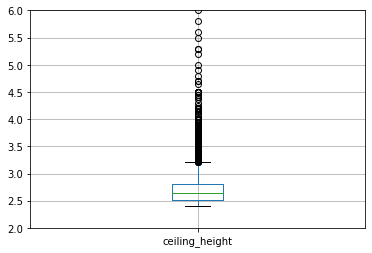

In [27]:
plt.ylim(2,6)
data.boxplot('ceiling_height', figsize=(4,4));

In [28]:
data['ceiling_height'].describe()

count    14451.000000
mean         2.727186
std          0.277753
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

Получается, что медианное значение не изменилось и составляет 2,65 метра. При этом второй квартиль находится в диапазоне 2,52 - 2,8 метра. Стандартное отклонение тоже пришло в норму и составляет 0,28 метра. Исходя из этого заполняем пустоты медианным значением.

In [29]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Настало время проверить, все ли пустоты заполнены.

In [30]:
data.isna().sum() / len(data) * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
floors_total             0.000000
living_area              0.000000
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.000000
locality_name            0.000000
airports_nearest        23.403442
cityCenters_nearest     23.305715
parks_around3000         0.000000
parks_nearest           65.914595
ponds_around3000         0.000000
ponds_nearest           61.640110
days_exposition         13.456554
living_area_ratio        0.000000
kitchen_area_ratio       0.000000
dtype: float64

Осталось 5 столбцов:
- расстояния до ближайшего аэропорта,
- расстояния до центра города,
- расстояния до ближайшего парка,
- расстояния до ближайшего водоема,
- срок размещения.
  
  Заполнить их нечем, так как точных данных нет. Оставим их как есть, возможно эти показатели не сильно влияют на стоимость объектов. Это мы узнаем позже, когда составим графики.

Осталось навести порядок с названиями, привести их к общепринятому виду.

In [31]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'studio' : 'is_studio', 'open_plan' : 'is_open_plan'})

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23535 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23535 non-null  int64         
 1   last_price            23535 non-null  float64       
 2   total_area            23535 non-null  float64       
 3   first_day_exposition  23535 non-null  datetime64[ns]
 4   rooms                 23535 non-null  int64         
 5   ceiling_height        23535 non-null  float64       
 6   floors_total          23535 non-null  int64         
 7   living_area           23535 non-null  float64       
 8   floor                 23535 non-null  int64         
 9   is_apartment          23535 non-null  bool          
 10  is_studio             23535 non-null  bool          
 11  is_open_plan          23535 non-null  bool          
 12  kitchen_area          23535 non-null  float64       
 13  balcony         

Всё отлично! Можно приступать к удалению дубликатов.

In [33]:
data.duplicated().sum()

0

Явных дубликатов нет. Проверим неявые. Посмотрим названия населенных пунктов.

In [34]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Присутствует большое количество неявных дубликатов. В первую очередь следует заменить все буквы Ё на Е. Далее пройдёмся по названиям деревень и посёлков и объединим повторяющиеся названия.

In [35]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок', 'коттеджный поселок'], 'поселок', regex=True)
    .replace(['садоводческое некоммерческое товарищество', 'садоводческое товарищество'], 'садовое товарищество', regex=True)
    .str.replace('поселок Мурино', 'Мурино')
    .str.replace('деревня Кудрово', 'Кудрово')
    .str.replace('деревня Федоровское', 'поселок Федоровское')
    .str.replace('село Никольское', 'Никольское')
    .str.replace('село Павлово', 'поселок Павлово')
   )

Проверим, что получилось

In [36]:
data['locality_name'].value_counts().head(20)

Санкт-Петербург            15639
Мурино                       586
Кудрово                      469
поселок Шушары               439
Всеволожск                   397
Пушкин                       369
Колпино                      338
поселок Парголово            327
Гатчина                      307
Выборг                       235
Петергоф                     201
Сестрорецк                   183
Красное Село                 175
деревня Новое Девяткино      143
Сертолово                    142
Ломоносов                    133
Кириши                       125
поселок Бугры                113
Сланцы                       112
Волхов                       111
Name: locality_name, dtype: int64

По топ-20 можно судить, что от неявных дубликатов мы избавились. Если где-то еще и будет задвоение вроде деревня/село, то на общую картину оценки это не повлияет, таких значений слишком мало.

**Вывод:** Этап предобработки окончен. Дубликаты удалены, недостающие значения в большинстве случаев заполнены

## 3. Добавим новые столбцы для дальнейших расчетов

Для дальнейшей работы нужны новые значения:
- цена квадратного метра,
- день публикации,
- десяц публикации,
- год публикации,
- тип этажа,
- расстояние до центра в километрах.

  Добавим эти значения.

In [38]:
#цена квадратного метра
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)

#день публикации
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

#месяц публикации
data['exposition_month'] = data['first_day_exposition'].dt.month

#год публикации
data['exposition_year'] = data['first_day_exposition'].dt.year

In [39]:
def floor_type(row):
    '''
    Определяет этаж по типу: первый, посдений, другой
    '''
    if row['floor'] == 1:
        return 'Первый'
    
    if row['floor'] == row['floors_total']:
        return 'Последний'
    
    return 'Другой'

In [40]:
data['floor_name'] = data.apply(floor_type, axis=1)

In [41]:
#расстояние до центра в километрах
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(0)

Посмотрим на обновлённый датафрейм.

In [42]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,price_square_meter,exposition_weekday,exposition_month,exposition_year,floor_name,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,755.0,NaN,0.472222,0.231481,120370.37,3,3,2019,Другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,81.0,0.460396,0.272277,82920.79,1,12,2018,Первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,574.0,558.0,0.612500,0.148214,92785.71,3,8,2015,Другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,100.461415,9,False,...,234.0,424.0,0.631833,0.128496,408176.10,4,7,2015,Другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121.0,0.320000,0.410000,100000.00,1,6,2018,Другой,8.0


**Вывод:** столбцы добавлены корректно. Можно приступать к исследовательскому анализу данных.

## Исследовательский анализ данных

**Распределение квартир по параметрам**

### Распределение по общей площади

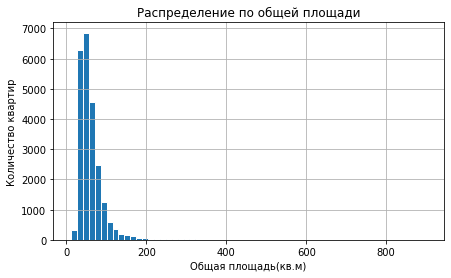

In [43]:
plt.figure(figsize=(7, 4))
plt.grid(True)

plt.hist(data['total_area'], bins=60, edgecolor='white')

plt.xlabel('Общая площадь(кв.м)')
plt.ylabel('Количество квартир')
plt.title('Распределение по общей площади');

По графику видно, что квартир с площадью более 300 кв.метров практически нет. Посмотрим, сколько их.

In [44]:
data.query('total_area >= 300').shape[0]

63

Итого всего 63 квартиры. Уберём их из расчета, для большей наглядности.

In [45]:
#удаляем значения свыше 300
data = data[data['total_area'] < 300]

Построим график еще раз. Теперь будет лучше.

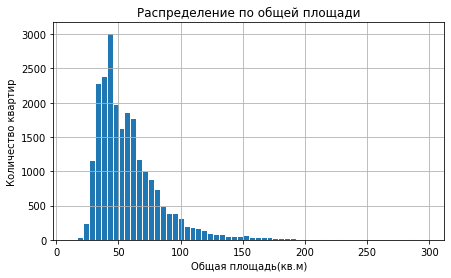

In [46]:
plt.figure(figsize=(7, 4))
plt.grid(True)

plt.hist(data['total_area'], bins=60, edgecolor='white')

plt.xlabel('Общая площадь(кв.м)')
plt.ylabel('Количество квартир')
plt.title('Распределение по общей площади');

In [47]:
data['total_area'].describe()

count    23472.000000
mean        59.413149
std         30.444281
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        297.500000
Name: total_area, dtype: float64

**Вывод:** большинство квартир имеет общую площадь около 50-60 кв.м., медиана - 52 кв.метра. Квартиры меньшей плащади тоже присутствуют в достаточном количестве, но с уменьшением площади их количество уменьшается в геометрической прогрессии. Такая же ситуация с квартирами большей площади. Квартиры по 80 кв.м еще есть в достаточном количестве - около 1000 штук, а уже более 100 кв.м и более становится меньше. Выходит, что основная масса квартир на продаже от 40 до 69 кв.метров

### Распределение по жилой площади

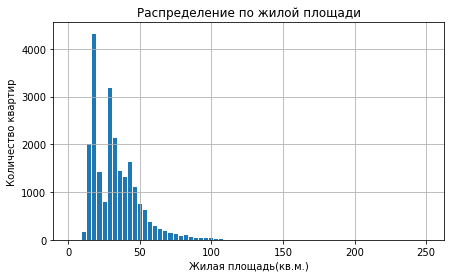

In [48]:
plt.figure(figsize=(7, 4))
plt.grid(True)

plt.hist(data['living_area'], bins=70, edgecolor='white')

plt.xlabel('Жилая площадь(кв.м.)')
plt.ylabel('Количество квартир')
plt.title('Распределение по жилой площади');

In [49]:
data['living_area'].describe()

count    23472.000000
mean        34.161470
std         20.072602
min          2.000000
25%         18.700000
50%         30.000000
75%         42.200000
max        250.000000
Name: living_area, dtype: float64

**Вывод:** в этой гистограмме появилось сразу 2 пика! Самое большое квартир получилось с жилой площадью около 25 кв.м.- более 6000 объявлений. Второй пик в районе 40 кв.м. - около 4000 объявлений. Такое необычное распределение может быть связано с изменением общей строительной концепции. Квартиры, построенные более 20-30 лет назад строились с маленькими площадями общего пользования (кухня, ванная, туалет, коридор, балкон и т.д.). В современных домах эти объекты стали занимать большую долю относительно общей площади, соответственно жилая площадь уменьшила свою долю. Плюс появились квартиры-студии, которых ранее не строили. Далее количество квартир ожидаемо уменьшается с увеличением жилой площади. Свыше 100 кв.м. квартир уже единицы. 

###  Распределение по площади кухни

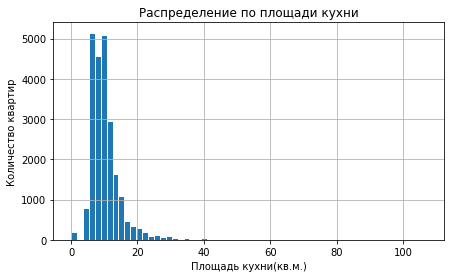

In [50]:
plt.figure(figsize=(7, 4))
plt.grid(True)

plt.hist(data['kitchen_area'], bins=60, edgecolor='white')

plt.xlabel('Площадь кухни(кв.м.)')
plt.ylabel('Количество квартир')
plt.title('Распределение по площади кухни');

In [51]:
data['kitchen_area'].describe()

count    23472.000000
mean        10.324081
std          5.564550
min          0.000000
25%          7.000000
50%          9.000000
75%         11.700000
max        107.000000
Name: kitchen_area, dtype: float64

В данном случае также наблюдаюся аномально высокие значения. Сколько кухонь меют площадь больше 60 кв.метров?

In [52]:
data.query('kitchen_area >= 60').shape[0]

20

20 квартир существенно выделяются из общей массы. Также уберём их из расчетов.

In [53]:
data = data[data['kitchen_area'] < 60]

Выводим график еще раз.

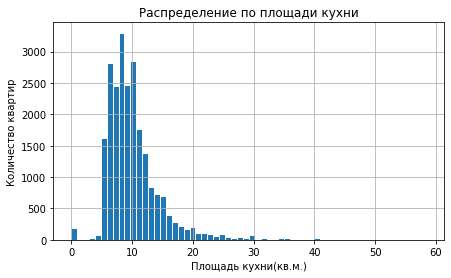

In [54]:
plt.figure(figsize=(7, 4))
plt.grid(True)

plt.hist(data['kitchen_area'], bins=60, edgecolor='white')

plt.xlabel('Площадь кухни(кв.м.)')
plt.ylabel('Количество квартир')
plt.title('Распределение по площади кухни');

In [55]:
data['kitchen_area'].describe()

count    23452.000000
mean        10.269709
std          5.229783
min          0.000000
25%          7.000000
50%          9.000000
75%         11.700000
max         58.400000
Name: kitchen_area, dtype: float64

**Вывод:** максимальное количество квартир имеют площадь 8-10 кв.метров - в общей слоности порядка 6000 штук. также выделяется пик на уровне 6-7 в.метров. Такое рспределение вполне характерно, так как раньше считалось, что кухня не должна быть большой, чтобы не нужно было много передвигаться, а до лебой точки можно было дотянуться, сделав максимум два шага. В современном же строительстве кухни стали занимать гораздо большую абсолютную площадь - кухни меньше 9 кв.метров не встречаются. Исключения - студии.

### Распределение по стоимости 

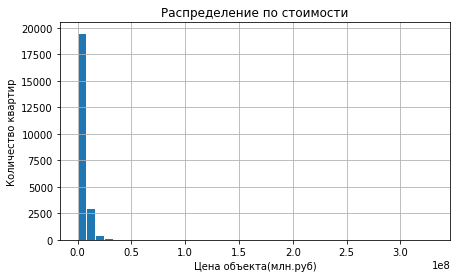

In [56]:
plt.figure(figsize=(7, 4))
plt.grid(True)

plt.hist(data['last_price'], bins=40, edgecolor='white')

plt.xlabel('Цена объекта(млн.руб)')
plt.ylabel('Количество квартир')
plt.title('Распределение по стоимости');

Из-за редких выбросов гистограмма ничего не показывает. Нужно проверить полезный диапазон.

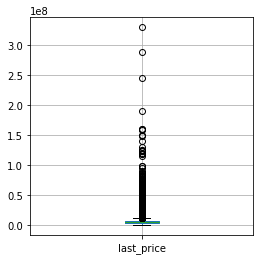

In [57]:
#строим гистограмму размаха
data.boxplot('last_price', figsize=(4, 4));

Основная масса объявлений находится до уровня в 10 млн.руб. Свыше 20 млн. всего 3 выброса. Целесообразно сократить диапазон до этого значения.

In [58]:
data = data.query('last_price <= 20000000')

Построим гистограмму еще раз.

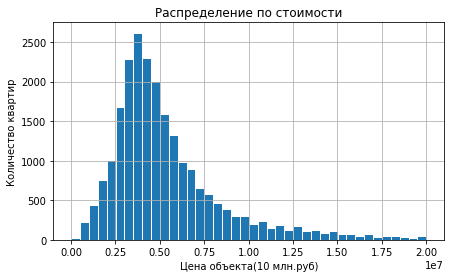

In [59]:
plt.figure(figsize=(7, 4))
plt.grid(True)

plt.hist(data['last_price'], bins=40, edgecolor='white')

plt.xlabel('Цена объекта(10 млн.руб)')
plt.ylabel('Количество квартир')
plt.title('Распределение по стоимости');

In [60]:
data['last_price'].describe()

count    2.282400e+04
mean     5.417688e+06
std      3.211480e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      2.000000e+07
Name: last_price, dtype: float64

**Вывод:** На данной гистограмме видно, что основную массу занимают квартиры в ценовом диапазоне 4-6 миллионов. Это более половины объявлений! Квартир со стоимостью 10-15 миллионов на порядок меньше, но всё же присутствуют в количестве более 1000 штук. Свыше 15 миллионов квартиры уже продаются редко.

### Распределение по количеству комнат

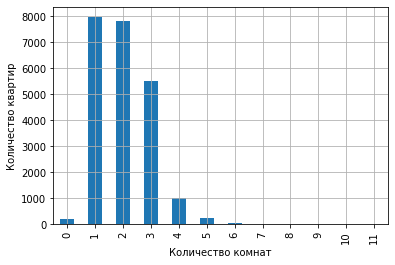

In [61]:
data.pivot_table(index='rooms', values='total_area', aggfunc='count').plot(kind='bar', legend=[], grid=True)

plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Квартир с количеством комнат больше 7 практически нет. Уберём их из анализа.

In [62]:
data = data.query('rooms <= 7')

И снова строим график.

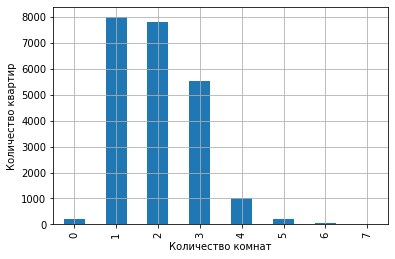

In [63]:
data.pivot_table(index='rooms', values='total_area', aggfunc='count').plot(kind='bar', legend=[], grid=True)

plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

In [64]:
data['rooms'].describe()

count    22816.000000
mean         2.007451
std          0.976398
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

**Вывод:** Максимальную долю забрали одно- и двухкомнатные квартиры - по 8000 каждые. Немного меньше трёхкомнатных - 5500 штук. Сильно меньше четырёхкомнатных - около 1000. Квартир с большим числом комнат уже тоже практически нет. Также можно заметить, что присутствуют квартиры вообще без комнат. Это новый формат жилья - студии. Пока их доля на рынке мала, но наверняка ситуация будет меняться со временем и их количество увеличится. Интересно посмотреть динамику через 5-10 лет.

### Распределение по высоте потолков

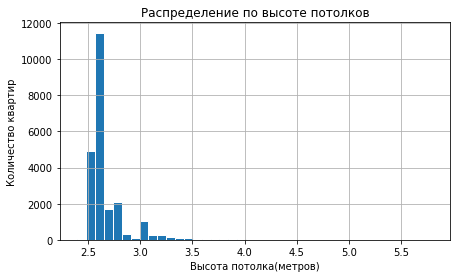

In [65]:
plt.figure(figsize=(7, 4))
plt.grid(True)

plt.hist(data['ceiling_height'], bins=40, edgecolor='white')

plt.xlabel('Высота потолка(метров)')
plt.ylabel('Количество квартир')
plt.title('Распределение по высоте потолков');

**Вывод:** 2/3 случаев потолок в квартире составляет 2,5 - 2,7 метра. Это стандартная высота потолка в современных домах. Также есть небольшой пик в районе 3 метров - около 1000 штук. Скорее всего это дома первой половины ХХ века постройки, когда потолки в квартирах делали выше.

### Распределение по этажам

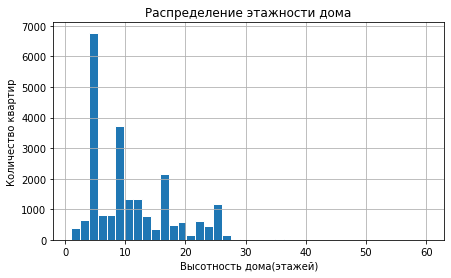

In [66]:
plt.figure(figsize=(7, 4))
plt.grid(True)

plt.hist(data['floors_total'], bins=40, edgecolor='white')

plt.xlabel('Высотность дома(этажей)')
plt.ylabel('Количество квартир')
plt.title('Распределение этажности дома');

**Вывод:** здесь получилась классическая картина для Санкт-Петербурга и России в целом. Был период, когда строились в основном пятиэтажные дома, вот и сейчас их доля на рынке около 7000. Потом есть пик на 9 этажах - тоже стандартная этажность определенного периода постройки, таких квартир почти 4000. И еще 2 пика: 16 и 25  этажей. Их по 2100 и 1200 соответственно. Это дома уже современного формата. Другие типы домов также встречаются, но гораздо реже. Возможно, экспериментальные или малотиражные постройки.

###  Распределение по расстоянию до центра города

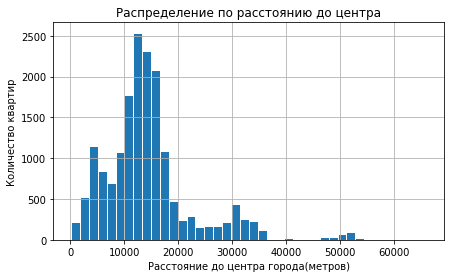

In [67]:
plt.figure(figsize=(7, 4))
plt.grid(True)

plt.hist(data['city_centers_nearest'], bins=40, edgecolor='white')

plt.xlabel('Расстояние до центра города(метров)')
plt.ylabel('Количество квартир')
plt.title('Распределение по расстоянию до центра');

**Вывод:** судя по гистограмме львиная доля квартир располагаются в радиусе 9-18 километров от центра, что вполне ожидаемо. Есть небольшой пик в районе 5 км,это исторические дома, их достаточно много. Ближе к центру объявлений меньше, так как и квартиры там дороже, и продаются реже, а также многие дома переведены в коммерческую недвижимость(офисы, гостиницы, магазины и т.д.). Провал между 5 и 9 километрами, возможно, объясняется промышленной застройкой в данной области(ранее на границе города). Со временем город вырос и промзона оказалась внутри,а новые дома строились уже ближе к современным окраинам. Также есть совсем небольшой пик за пределами 30 км - это, вероятно, современная концепция освоения областей за пределами мегаполиса.

###  Распределение по расстоянию до ближайшего парка

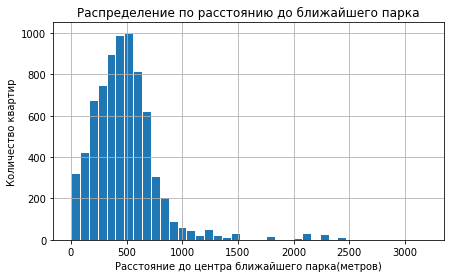

In [68]:
plt.figure(figsize=(7, 4))
plt.grid(True)

plt.hist(data['parks_nearest'], bins=40, edgecolor='white')

plt.xlabel('Расстояние до центра ближайшего парка(метров)')
plt.ylabel('Количество квартир')
plt.title('Распределение по расстоянию до ближайшего парка');

**Вывод:** картина получилась очень приятная! Почти все дома имеют зону для отдыха в непосредственной близости, в радиусе не более километра, а основная масса и вовсе имеет парк в 300-600 метрах, то есть в пятиминутной шаговой доступности.

###  Анализ скорости продажи

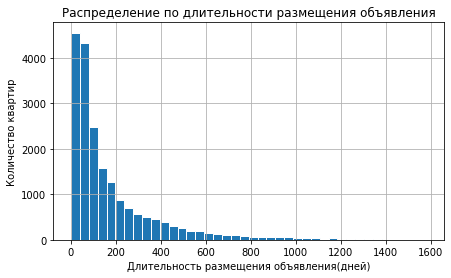

In [69]:
plt.figure(figsize=(7, 4))
plt.grid(True)

plt.hist(data['days_exposition'], bins=40, edgecolor='white')

plt.xlabel('Длительность размещения объявления(дней)')
plt.ylabel('Количество квартир')
plt.title('Распределение по длительности размещения объявления');

In [70]:
data['days_exposition'].describe()

count    19849.000000
mean       177.687440
std        216.441255
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод:** согласно статистике большинство квартир продаются в первые 100 дней. Медиана составляет 93 дня, в то время как среднее время размещения - 177 дней. Такой показатель обусловлен наличием объявлений с очень длительным сроком размещения - 1580 дней(4,5 года!!!). В то же время есть и объявления, которые были на доске всего 1 день. Стандартный же разброс составляет 44 - 226 дней. Именно на такой срок нужно ориентироваться при продаже жилой недвижимости.

**Изучение факторов, влияющих на стоимость квадратного метра жилья**

###  Взаимосвязь общей площади со стоимостью

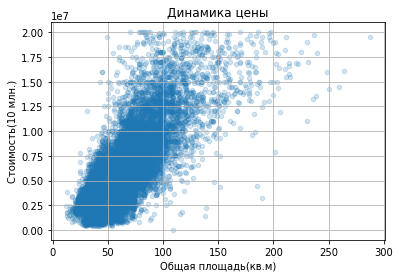

In [71]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2)

plt.grid(True)
plt.xlabel('Общая площадь(кв.м)')
plt.ylabel('Стоимость(10 млн.)')
plt.title('Динамика цены');

In [72]:
#смотрим корреляцию
data['total_area'].corr(data['last_price'])

0.7735532324193143

**Вывод:** на графике отчетливо видно, что с увеличением общей площади увеличивается и цена, что вполне ожидаемо, ведь стоимость жилья обычно расчитывают из стоимоти 1 кв.метра в определённом районе. Коэффициент корреляции 0,77 лишний раз это подтверждает.

###  Взаимосвязь жилой площади со стоимостью

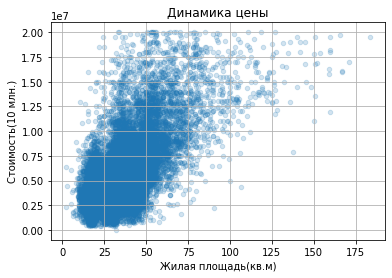

In [73]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.2)

plt.grid(True)
plt.xlabel('Жилая площадь(кв.м)')
plt.ylabel('Стоимость(10 млн.)')
plt.title('Динамика цены');

In [74]:
#смотрим корреляцию
data['living_area'].corr(data['last_price'])

0.6701255292129189

**Вывод:** в случае с жилой площадью корреляция тоже весьма очевидная - 0,67, однако это меньше, чем в случае с общей площадью. Это скорее всего связано как раз со сменой типовой застрйки. Доля жилой площади относительно общей уменьшилась, соответственно меньшая жилая площадь в новых домах может стоить также, как большая в домах предыдущего поколения, ведь цена всё также считается за 1 кв.м общей площади. 

###  Взаимосвязь площади кухни со стоимостью

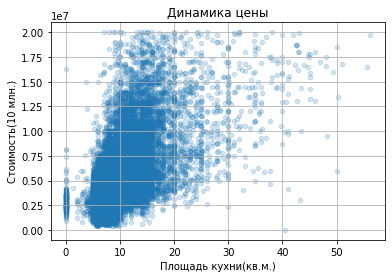

In [75]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2)

plt.grid(True)
plt.xlabel('Площадь кухни(кв.м.)')
plt.ylabel('Стоимость(10 млн.)')
plt.title('Динамика цены');

In [76]:
#смотрим корреляцию
data['kitchen_area'].corr(data['last_price'])

0.5808085338056338

**Вывод:** еще меньше прослеживается взаимосвязь между площадью кухни и общей стоимостью жилья. Это тоже очень логично, ведь кухня занимает примерно одинаковую площадь не зависимо от количества комнат или общей площади квартиры. На графике отчётливо видны вертикальные столбцы - площадь одна, а цена увеличивается.

### Взаимосвязь количества комнат со стоимостью

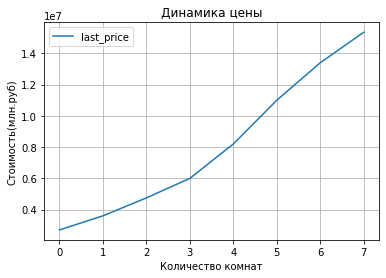

In [77]:
#находим медианное значение цены  и строим график
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot();

plt.grid(True)
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость(млн.руб)')
plt.title('Динамика цены');

**Вывод:** видно, что рост цены прямо пропорционален увеличению количества комнат. 

###  Взаимосвязь типа этажа со стоимостью

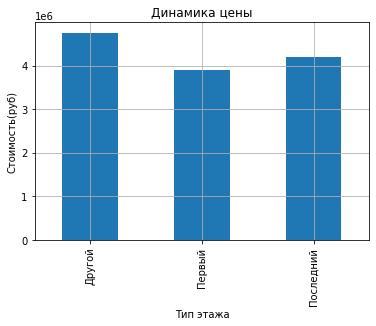

In [78]:
#находим медианное значение цены  и строим график
data.pivot_table(index='floor_name', values='last_price', aggfunc='median').plot(kind='bar', legend=[], grid=True);

plt.xlabel('Тип этажа')
plt.ylabel('Стоимость(руб)')
plt.title('Динамика цены');

**Вывод:** исходя из поолученных данных видно, что расположение квартиры по вертикали тоже имеет самое прямое отношение к итоговой стоимости продажи. Дешевле всего стоят квартиры, расположенные на первом этаже, немного дороже - расположенные на последнем этаже. Самые дорогие квартиры имеют статус "кроме первого и последнего".

### Взаимосвязь срока размещения объявления со стоимостью

Text(0.5, 1.0, 'Динамика цены')

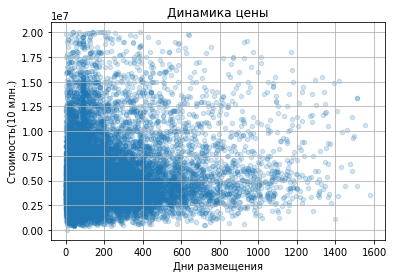

In [79]:
data.plot(x='days_exposition', y='last_price', kind='scatter', alpha=0.2)

plt.grid(True)
plt.xlabel('Дни размещения')
plt.ylabel('Стоимость(10 млн.)')
plt.title('Динамика цены')

In [80]:
#смотрим корреляцию
data['days_exposition'].corr(data['last_price'])

0.1194359537290639

**Вывод:** выходит, что длительность размещения практически не влияет на стоимость квартир. Даже если квартира долго не продаётся, снижать цену владельцы не стремятся.

###  Взаимосвязь дня размещения объявления со стоимостью

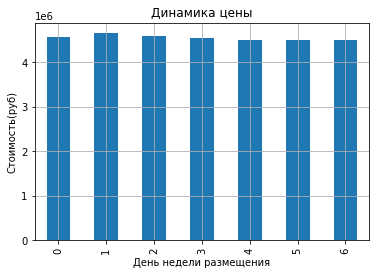

In [81]:
#находим медианное значение цены  и строим график
data.pivot_table(index='exposition_weekday', values='last_price', aggfunc='median').plot(kind='bar', legend=[], grid=True);

plt.xlabel('День недели размещения')
plt.ylabel('Стоимость(руб)')
plt.title('Динамика цены');

**Вывод:** по графику видно, что стоимость продажи квартир правктически не отличается от дня размещения объявления. В данном случае взаимосвязи нет.

###  Взаимосвязь месяца размещения объявления со стоимостью

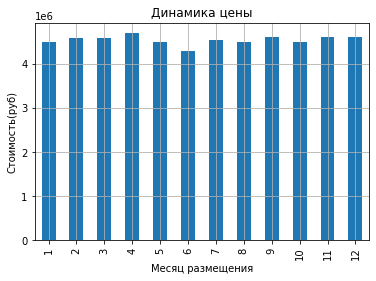

In [82]:
#находим медианное значение цены  и строим график
data.pivot_table(index='exposition_month', values='last_price', aggfunc='median').plot(kind='bar', legend=[], grid=True);

plt.xlabel('Месяц размещения')
plt.ylabel('Стоимость(руб)')
plt.title('Динамика цены');

**Вывод:** с начала года и до апреля цены немного, но повышаются. Далее до июня цены начинают падать, а потом снова с небольшими колебаниями вверх-вниз, но неуклонно растут.

###  Взаимосвязь года размещения объявления со стоимостью

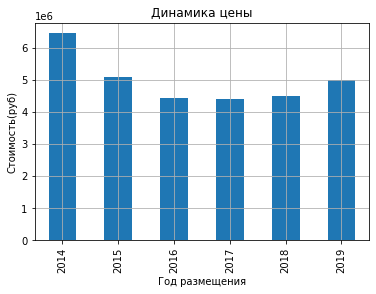

In [83]:
#находим медианное значение цены  и строим график
data.pivot_table(index='exposition_year', values='last_price', aggfunc='median').plot(kind='bar', legend=[], grid=True);

plt.xlabel('Год размещения')
plt.ylabel('Стоимость(руб)')
plt.title('Динамика цены');

**Вывод:** видно, что в 2014 году средняя стоимость жилья была выше 6 миллионов. Далее идёт снижение до 5 миллионов в 2015 году и до 4,5 миллионов в 2016-2017 гг. Такая динамика свидетельствует о том, что в продаже стало больше квартир меньшей квадратуры (прямую зависимость роста цены с ростом площади мы определили выше). Далее опять намечается рост средней цены, который связан с инфляционными процессами.

###  Стоимость 1 кв.метра в городах с наибольшим количеством объявлений

Рассмотрим топ-10 городов с наибольшим количеством предложений о продаже.

In [84]:
data_top10 = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count','mean'])
data_top10.columns = ['flats_total', 'price_square_meter']
data_top10 = data_top10.sort_values('flats_total', ascending=False).head(10)
data_top10

,flats_total,price_square_meter
locality_name,,
Санкт-Петербург,14941,108678.724840
Мурино,586,86041.116024
Кудрово,469,95261.963412
поселок Шушары,439,78551.344647
Всеволожск,396,67275.625859
Пушкин,358,101864.461788
Колпино,337,75333.295816
поселок Парголово,327,90175.913089
Гатчина,307,68746.146515


**Вывод:** Наибольшая цена за метр квадратный ожидаемо получилась непосредственно в Санкт-Петербурге - почти 109 тыс.руб. Немногим меньше цена в Пушкине - 102 тыс.руб. и Кудрово - 95 тыс.руб. Дешевле всего один "квадрат" обойдётся в Выборге - 58 тыс.руб.

Также составим покилометровую таблицу средней цены только для Санкт-Петербурга и для наглядности отобразим эти данные в графике

In [85]:
#ищем среднее на каждый километр
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb = data_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')

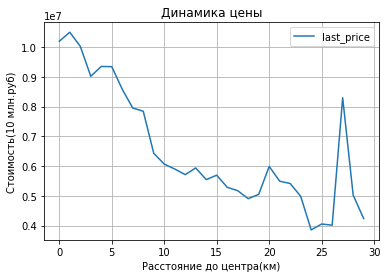

In [86]:
data_spb.plot()

plt.grid(True)
plt.xlabel('Расстояние до центра(км)')
plt.ylabel('Стоимость(10 млн.руб)')
plt.title('Динамика цены');

**Вывод:** по графику видно, что цена квартир имеет общую тенденцию к снижению с увеличением расстояния. Тем не менее, на расстоянии 20 и 27 километров от центра наблюдаются зона повышения стоимости! Это скорее всего связано с районом затройки(например, Курортный), который является престижным. Проверим.

In [87]:
#смотрим объявления на отдалении 27 км
data.query('city_centers_nearest_km == 27').sort_values(by='last_price', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,price_square_meter,exposition_weekday,exposition_month,exposition_year,floor_name,city_centers_nearest_km
140,8,16912000.0,105.7,2016-12-09,2,2.70,3,48.4,1,False,...,179.0,390.0,0.457900,0.145695,160000.00,4,12,2016,Первый,27.0
7996,17,16600000.0,106.0,2017-12-02,4,3.20,3,50.0,3,False,...,NaN,NaN,0.471698,0.283019,156603.77,5,12,2017,Последний,27.0
15578,20,16000000.0,101.9,2018-01-08,2,2.87,4,48.1,1,False,...,368.0,NaN,0.472031,0.263984,157016.68,0,1,2018,Первый,27.0
12466,11,15000000.0,89.6,2017-01-31,3,2.65,3,57.0,3,False,...,509.0,357.0,0.636161,0.150670,167410.71,1,1,2017,Последний,27.0
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,NaN,128.0,0.405405,0.337838,193918.92,1,11,2017,Другой,27.0


Вот и причина - в топ-5 попали квартиры со стоимостью 14,5 - 17 млн. Этажность зданий здесь не превышает 5, а в большей части 3 этажей. Общая площад более 100 кв.метров при количестве комнат равной 2 свидетельствует о том, что это район с этиной недвижимостью и такой рост цен на отдалении от центра логичен.

In [91]:
data.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,price_square_meter,exposition_weekday,exposition_month,exposition_year,floor_name,city_centers_nearest_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,NaN,128.0,0.405405,0.337838,193918.92,1,11,2017,Другой,27.0
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,NaN,178.0,0.515625,0.218750,70312.50,1,2,2018,Последний,27.0


Вот и причина появления пика - стоимость одной из кватрир на порядок выше среднего значения.

## Общий вывод

Проведена масштабная работа по предобработке данных: 
- удалены неинформативные строки и выбросы;
- пустые значения в жилой площади и площадь кухни заполнены по медиане исходя из количества комнат;
- устранены неявные дубликаты в названиях населённых пунктов;
- созданы столбцы с новыми параметрами, необходимыми для исследования.

Произведен исследовательский анализ данных:
  - оценено распределение квартир от общего числа по: общей площади, жилой площади, площади кухни, стоимости, количеству комнат, высоте потолков, этажам, растоянию до центра города, расстоянию до ближайшего парка;
  - оценена скорость продажи недвижимости;
  - оценена стоимость 1 кв.метра  недвижимости в зависимости от: общей площади, жилой площади, площади кухни, количества комнат, типа этажа, срока размещения объявления, времени размещения объявления(день, месяц, год);
  - исследована средняя стоимость квадратного метра в 10 крупнейших локациях области;
  - отслежена динамика изменения цены в Санкт-Петербурге при удалении от центра города.

**Главные выводы:**
- основная масса квартир приходится на диапазон 40-69 кв.м. Квартиры с большей и меньшей общей площадью встречаются значительно реже;
- по жилой плащади выделяются квартиры со значением 25 кв.м. и 40 кв.м. Они занимают половину рынка. Такое распределение может быть из-за отличий в типе застройки;
- площадь кухни в квартирах в большинстве случаев имеет 2 формата: 6-7 кв.метров или 9-10 кв.метров и не зависит от общей площади или количества комнат. При этом попадаются варианты с кухней 20 кв.метров, но таких квартир значительно меньше;
- большинство квартир по цене находится в диапазоне от 2 до 10 млн.руб. Оновная часть - квартиры со стоимостью 4-7 млн.руб. Имеется также отдельных кластер квартир со стоимость 10-15 млн.руб. В общей массе их значительно меньше, но они также имеют достаточное количество предложений;
- на рынке в основном представлены одно-, двух- и трёхкомнатные квартиры - порядка 90%. В небольшом количестве присутствуют студии, четырёх- и пятикомнатные квартиры.
- высота потолка в основном находится в районе 2,5 - 2,7 метра. Есть небольшой пласт квартир с потолком 3,0 - 3,2 метра. Вероятно, осторическая застройка;
- дома обычно имеют 5, 9, 16 или 25 этажей. Первые два встречаются чаще, вторые два скорее всего относятся к современной застройке и их доля со временем будет только расти;
- большая доля квартир находится в радиусе 2-20 км от центра города, в самом центре квартиры тоже встречаются, но их довольно мало. Есть также ощутимая доля квартир в радиусе 20 - 35 км. от центра - вероятнее всего города-спутники Санкт-Петербурга;
- более 90% квартир имеют парк в шаговой доступности, в большинстве случаев расстояние не превышает 500 метров;
- стоимость квадратного метра увеличивается прямо пропорицанально увеличению общей или жилой площади, с общей площадью корреляция немного выше. Площадь кухни практически не влияет на ценообразование;
- чем больше комнат в квартире, тем выше цена квартиры ;
- квартиры на первом и последнем этажах дешевле;
- день недели никак не влияет на стоимость продажи
- квартиры выгоднее всего покупать в июне - цена ниже;
- с каждым годом средняя стоимость квартир растёт, спад цен с 2014 по 2017 гг. обусловлен увеличением доли квартир меньшей площади;
- среднее время размещения объявления составляет 5,5 месяцев, однако большинство квартир продаются в течение первых 3,5 месяцев. Бывают и крайние случаи продажи за 1 день или за 7,5 лет;
- Самые дорогие квартиры исходя из стоимости квадратного метра находятся в Санкт-Петербурге, Пушкине и Кудрово(95-109 тыс.р/кв.м), дешевле всего - в Выборге, почти в 2 раза (58 тыс.р/кв.м)
- В Санкт-Петербурге стоимость жилья в целом снижается при удалении от центра, однако в радиусе 27 км от центра присутствует район с дорогой недвижимостью, скорее всего элитной.

Также хочется заметить, что в изначальном датефрейме имеется большое количество незаполненных значений, которые затрудняют анализ. Для части из них стоит внедрить процесс автозаполнения: в половине случаев не указано клочиство балконов, значит следует автоматически заполнить ячейку значением "0"; имеются таже существенное количество пропусков в жилой площади и площади кухни. Возможно, необходимо сделать эти поля обязательными для заполнения, либо заполнять их автоматически на основании номера проекта или года постройки дома. Также стоит сделать контекстный выбор из двух значений при указании, является ли жилплощадь апартаментами(только варианты "да" или "нет"); если продавец не указывает высоту потолка, значит она стандртная - автоматически ставить значение "2,65". Большие вопросы таже вызывает система автоматического заполнения ячеек по геолокации: расстояние до ближайшего аэропорта не указано в 23% случаев, до ближайшего парка - 66%, до ближайшего водоёма - 62%. Систему следует доработать. Возможно, увеличить радиус поиска. Если в радиусе 3 км таких объектов не обнаружено - проставлять значение 0 в колонках с их количеством, а не оставлять пустое значение.